# Poder do Teste e Variabilidade

O **poder de um teste estatístico** (ou **power**) é a **probabilidade de rejeitar corretamente a hipótese nula $H_0$ quando ela é de fato falsa**. Em outras palavras, é a capacidade do teste de **detectar um efeito real** quando ele existe.

Por exemplo, imagine que você quer saber se uma nova medicação é mais eficaz do que o placebo. Se o teste estatístico tem **baixo poder**, mesmo que a medicação funcione de verdade, o teste pode **falhar em detectá-la**, levando a uma **falsa conclusão de que ela não funciona**.


### Definição formal

> O **poder de um teste** é dado por:
>
> $$
> \text{Poder} = 1 - \beta
> $$
>
> onde $$\beta$$ é a **probabilidade de cometer um erro tipo II**, ou seja, **não rejeitar $H_0$ quando ela é falsa**.

---

### 📊 Interpretação

| Situação real da hipótese nula | Decisão do teste          | Consequência           |
|-------------------------------|----------------------------|------------------------|
| $H_0$ é **verdadeira**     | Rejeita $H_0$          | Erro tipo I ($\alpha$) |
| $H_0$ é **verdadeira**     | Não rejeita $H_0$      | Decisão correta        |
| $H_0$ é **falsa**          | Rejeita $H_0$          | **Poder do teste**     |
| $H_0$ é **falsa**          | Não rejeita $H_0$      | Erro tipo II ($\beta$) |

---

### 🔬 Fatores que afetam o poder do teste

1. **Tamanho da amostra** \( n \) — quanto maior a amostra, maior o poder.
2. **Nível de significância** \( \alpha \) — um \( \alpha \) mais alto (como 0,10) tende a aumentar o poder, mas também aumenta a chance de erro tipo I.
3. **Tamanho do efeito** — efeitos maiores são mais fáceis de detectar, aumentando o poder.
4. **Variabilidade dos dados** — menor variabilidade (menor desvio padrão) → maior poder.

### Poder x variabilidade

Na simulação abaixo, exploramos como a variabilidade dos dados influencia o **poder de um teste estatístico**.
Vamos comparar dois cenários:
- Mesma diferença entre médias
- Diferente variabilidade (baixo vs. alto desvio padrão)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Configurações
np.random.seed(42)
n = 30
mean_a, mean_b = 100, 110

#### Cenário 1: Baixa variabilidade
Desvio padrão = 5

In [6]:
std_low = 5
group_a_low = np.random.normal(mean_a, std_low, n)
group_b_low = np.random.normal(mean_b, std_low, n)
t_stat_low, p_val_low = ttest_ind(group_a_low, group_b_low)
print(f"p-valor (baixa variabilidade): {p_val_low:.4f}")

p-valor (baixa variabilidade): 0.0000


#### Cenário 2: Alta variabilidade
Desvio padrão = 20

In [7]:
std_high = 20
group_a_high = np.random.normal(mean_a, std_high, n)
group_b_high = np.random.normal(mean_b, std_high, n)
t_stat_high, p_val_high = ttest_ind(group_a_high, group_b_high)
print(f"p-valor (alta variabilidade): {p_val_high:.4f}")

p-valor (alta variabilidade): 0.0623


#### Visualização comparativa
Abaixo, comparamos os dois cenários usando histogramas.

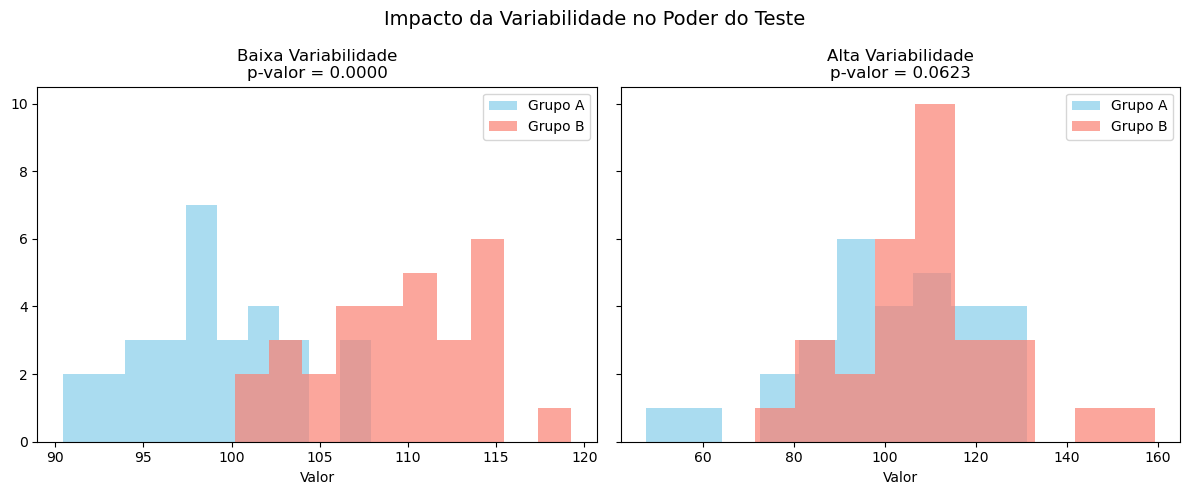

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

axes[0].hist(group_a_low, bins=10, alpha=0.7, label='Grupo A', color='skyblue')
axes[0].hist(group_b_low, bins=10, alpha=0.7, label='Grupo B', color='salmon')
axes[0].set_title(f'Baixa Variabilidade\np-valor = {p_val_low:.4f}')
axes[0].set_xlabel('Valor')
axes[0].legend()

axes[1].hist(group_a_high, bins=10, alpha=0.7, label='Grupo A', color='skyblue')
axes[1].hist(group_b_high, bins=10, alpha=0.7, label='Grupo B', color='salmon')
axes[1].set_title(f'Alta Variabilidade\np-valor = {p_val_high:.4f}')
axes[1].set_xlabel('Valor')
axes[1].legend()

fig.suptitle('Impacto da Variabilidade no Poder do Teste', fontsize=14)
plt.tight_layout()
plt.show()

#### Conclusão
- Mesmo com a **mesma diferença entre médias**, o teste teve **maior poder** no cenário com **menor variabilidade**.
- **Alta variabilidade dificulta a detecção de efeitos reais**, pois aumenta a sobreposição entre os grupos.
- Isso reforça a importância de controlar a variabilidade em experimentos estatísticos.